In [1]:
import pandas as pd
import requests
from selenium.common.exceptions import TimeoutException
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import datetime
from trading_bot import *
import plotly


plotly.tools.set_credentials_file(username='dkema', api_key='nTKqDrhYl2Hko259wGGk')
pd.options.display.max_columns = 100



In [2]:

def calculate_positions(myticker, positions, dateTimeMask):
    
    df = getData(ticker=myticker)
    
    mymask = ((df["datetime"] > dateTimeMask))
    
    cols = df.columns.tolist()
    reduced_df = df[[cols[0],
                    cols[1],
                    cols[3],
                    cols[5],
                    cols[7],
                     cols[-2],
                    ]].loc[mymask].reset_index(drop=True).set_index("datetime").astype(float
                                                                                    )
    
    reduced_df['returns'] = np.log(reduced_df["4a. close (USD)"] / reduced_df["4a. close (USD)"].shift(1))
    
    reduced_df.head()
    
    #positions = positions
    
    for position in positions:
        #magic happens here
        
        col = 'rolling_%s' % position[0]
        col1 = 'rolling_%s' % position[1]

        reduced_df[col] = reduced_df["4a. close (USD)"].rolling(position[0]).mean()
        reduced_df[col1] = reduced_df["4a. close (USD)"].ewm(position[1]).mean()
        reduced_df["divergence_%s"%str(position)] = reduced_df[col1] - reduced_df[col]
        reduced_df["signal_%s"%str(position)] = np.sign(reduced_df["divergence_%s"%str(position)])
        
    strats = ['returns']  # 19
    
    for position in positions:  # 20
        strat = 'strategy_%s' % str(position)  # 21
        reduced_df[strat] = reduced_df["signal_%s"%str(position)].shift(1) * reduced_df['returns']  # 22
        strats.append(strat)  # 23
    
    for i in strats: print(i)
    for strat in strats:
        print("strat %s"%strat)
        #print(strat)
        cumm_ret = 'cummulative_%s' % str(strat)
        #print(cumm_ret)
        reduced_df[cumm_ret] =  reduced_df[strat].fillna(0).cumsum().apply(np.exp)
        
    reduced_df["cummulative_returns"] = reduced_df["returns"].fillna(0).cumsum().apply(np.exp)
    #reduced_df.tail(20)
    return reduced_df, strats

def return_rawData(df):

    strategy_comparison_df  = df[[i for i in df.columns if i[:11] == "cummulative"]]
    index = strategy_comparison_df.index
    rawData = {

        "index":index,
        "column_names": strategy_comparison_df.columns.tolist(),
        "values": [strategy_comparison_df[j].fillna(0).values for j in strategy_comparison_df.columns.tolist()]
    }
    return rawData

In [3]:

myticker = "BTC"
positions_1 = [(10+i, 15+i) for i in range(50)]
positions_2 = [(5+i, 15+i+10) for i in range(50)]
positions = positions_1 + positions_2
dateTimeMask = datetime.datetime(year=2018,month=2,day=1)


df, starts = calculate_positions(myticker=myticker,
                                 positions=positions,
                                 dateTimeMask=dateTimeMask)

API Success
Auth Success
{'1. Information': 'Daily Prices and Volumes for Digital Currency', '2. Digital Currency Code': 'BTC', '3. Digital Currency Name': 'Bitcoin', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2018-08-31 (end of day)', '7. Time Zone': 'UTC'}
returns
strategy_(10, 15)
strategy_(11, 16)
strategy_(12, 17)
strategy_(13, 18)
strategy_(14, 19)
strategy_(15, 20)
strategy_(16, 21)
strategy_(17, 22)
strategy_(18, 23)
strategy_(19, 24)
strategy_(20, 25)
strategy_(21, 26)
strategy_(22, 27)
strategy_(23, 28)
strategy_(24, 29)
strategy_(25, 30)
strategy_(26, 31)
strategy_(27, 32)
strategy_(28, 33)
strategy_(29, 34)
strategy_(30, 35)
strategy_(31, 36)
strategy_(32, 37)
strategy_(33, 38)
strategy_(34, 39)
strategy_(35, 40)
strategy_(36, 41)
strategy_(37, 42)
strategy_(38, 43)
strategy_(39, 44)
strategy_(40, 45)
strategy_(41, 46)
strategy_(42, 47)
strategy_(43, 48)
strategy_(44, 49)
strategy_(45, 50)
strategy_(46, 51)
strategy_(47, 52)
str

Text(0.5,1,'Cummulative Returns from 2018-02-01 00:00:00')

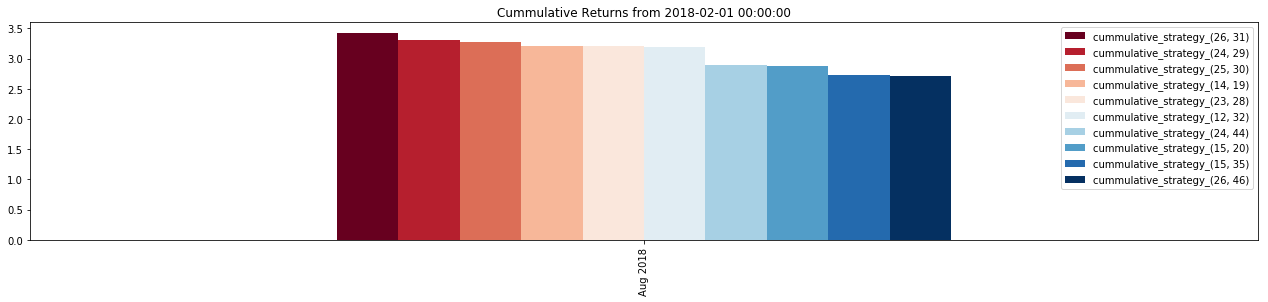

In [4]:

results = df[[i for i in df.columns if i.startswith("cummulative")]].tail(1).T.sort_values(by=df.index[-1], ascending=False)
results.columns = [i.strftime("%b %Y") for i in results.columns]
results.head(10).T.plot(kind="bar", figsize=(22,4), cmap="RdBu")
plt.title("Cummulative Returns from %s"%str(dateTimeMask))


In [5]:
df.columns.tolist()

['1a. open (USD)',
 '2a. high (USD)',
 '3a. low (USD)',
 '4a. close (USD)',
 '5. volume',
 'returns',
 'rolling_10',
 'rolling_15',
 'divergence_(10, 15)',
 'signal_(10, 15)',
 'rolling_11',
 'rolling_16',
 'divergence_(11, 16)',
 'signal_(11, 16)',
 'rolling_12',
 'rolling_17',
 'divergence_(12, 17)',
 'signal_(12, 17)',
 'rolling_13',
 'rolling_18',
 'divergence_(13, 18)',
 'signal_(13, 18)',
 'rolling_14',
 'rolling_19',
 'divergence_(14, 19)',
 'signal_(14, 19)',
 'rolling_20',
 'divergence_(15, 20)',
 'signal_(15, 20)',
 'rolling_21',
 'divergence_(16, 21)',
 'signal_(16, 21)',
 'rolling_22',
 'divergence_(17, 22)',
 'signal_(17, 22)',
 'rolling_23',
 'divergence_(18, 23)',
 'signal_(18, 23)',
 'rolling_24',
 'divergence_(19, 24)',
 'signal_(19, 24)',
 'rolling_25',
 'divergence_(20, 25)',
 'signal_(20, 25)',
 'rolling_26',
 'divergence_(21, 26)',
 'signal_(21, 26)',
 'rolling_27',
 'divergence_(22, 27)',
 'signal_(22, 27)',
 'rolling_28',
 'divergence_(23, 28)',
 'signal_(23, 28)

In [6]:
df.to_json(orient="split",index=False)

'{"columns":["1a. open (USD)","2a. high (USD)","3a. low (USD)","4a. close (USD)","5. volume","returns","rolling_10","rolling_15","divergence_(10, 15)","signal_(10, 15)","rolling_11","rolling_16","divergence_(11, 16)","signal_(11, 16)","rolling_12","rolling_17","divergence_(12, 17)","signal_(12, 17)","rolling_13","rolling_18","divergence_(13, 18)","signal_(13, 18)","rolling_14","rolling_19","divergence_(14, 19)","signal_(14, 19)","rolling_20","divergence_(15, 20)","signal_(15, 20)","rolling_21","divergence_(16, 21)","signal_(16, 21)","rolling_22","divergence_(17, 22)","signal_(17, 22)","rolling_23","divergence_(18, 23)","signal_(18, 23)","rolling_24","divergence_(19, 24)","signal_(19, 24)","rolling_25","divergence_(20, 25)","signal_(20, 25)","rolling_26","divergence_(21, 26)","signal_(21, 26)","rolling_27","divergence_(22, 27)","signal_(22, 27)","rolling_28","divergence_(23, 28)","signal_(23, 28)","rolling_29","divergence_(24, 29)","signal_(24, 29)","rolling_30","divergence_(25, 30)","s

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
import colorlover as cl

#bupu500 = cl.interp( bupu, 500 ) 
rawData = return_rawData(df.tail(df.shape[0]-5))
rawData.keys()
# Create random data with numpy

traces = [
    go.Scatter(
    x = rawData["index"],
    y = rawData["values"][i],
    mode = 'lines',
    name = rawData["column_names"][i])
    
    for i in list(range(len(rawData["column_names"]))) 
] 

#data = [trace0, trace1, trace2]

layout = dict(title = 'Trading Strategy Comparisons',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=traces, layout=layout)
py.iplot(fig, layout=layout,filename='Returns Strategy Comparison')